# Bike Share System

*Modeling and Simulation in Python*

Copyright 2021 Allen Downey

License: [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-nc-sa/4.0/)

In [1]:
# import functions from modsim
from modsim import *

In [2]:
def step(state, p12, p13, p21, p23, p31, p32):
    if flip(p12):
        b12(state)
    
    if flip(p13):
        b13(state)
        
    if flip(p21):
        b21(state)
    
    if flip(p23):
        b23(state)
        
    if flip(p32):
        b32(state)
    
    if flip(p31):
        b31(state)
        
def b12(state):
    if state.b1 == 0:
        state.b1_empty += 1
        return
    state.b1 -= 1
    state.b2 += 1
    
def b13(state):
    if state.b1 == 0:
        state.b1_empty += 1
        return
    state.b1 -= 1
    state.b3 += 1
    
def b21(state):
    if state.b2 == 0:
        state.b2_empty += 1
        return
    state.b2 -= 1
    state.b1 += 1
    
def b23(state):
    if state.b2 == 0:
        state.b2_empty += 1
        return
    state.b2 -= 1
    state.b3 += 1
    
def b32(state):
    if state.b3 == 0:
        state.b3_empty += 1
        return
    state.b3 -= 1
    state.b2 += 1
    
def b31(state):
    if state.b3 == 0:
        state.b3_empty += 1
        return
    state.b3 -= 1
    state.b1 += 1

In [3]:
def run_simulation(state, p12, p13, p21, p23, p31, p32, num_steps, do_plot=True):

    results_1 = TimeSeries()
    results_1[0] = state.b1
    results_2 = TimeSeries()
    results_2[0] = state.b2
    results_3 = TimeSeries()
    results_3[0] = state.b3
    results_1_unsatisfied = TimeSeries()
    results_1_unsatisfied[0] = state.b1_empty
    results_2_unsatisfied = TimeSeries()
    results_2_unsatisfied[0] = state.b2_empty
    results_3_unsatisfied = TimeSeries()
    results_3_unsatisfied[0] = state.b3_empty
    
    for i in range(num_steps):
        step(state, p12, p13, p21, p23, p31, p32)
        results_1[i+1] = state.b1
        results_2[i+1] = state.b2
        results_3[i+1] = state.b3
        results_1_unsatisfied[i+1] = state.b1_empty
        results_2_unsatisfied[i+1] = state.b2_empty
        results_3_unsatisfied[i+1] = state.b3_empty
        
    if (do_plot):
        fig, ax = plt.subplots(1,2,figsize=(12,6))
        ax[0].plot(results_1, label='b1')
        ax[0].plot(results_2, label='b2')
        ax[0].plot(results_3, label='b3')
        ax[0].set_xlabel('Time step (min)')
        ax[0].set_ylabel('Number of bikes')
        ax[0].legend()
        ax[1].plot(results_1_unsatisfied, label='b1_u')
        ax[1].plot(results_2_unsatisfied, label='b2_u')
        ax[1].plot(results_3_unsatisfied, label='b3_u')
        ax[1].set_xlabel('Time step (min)')
        ax[1].set_ylabel('Number of unsatisfied customers')
        ax[1].legend()
        plt.show()
    
    return results_1_unsatisfied[num_steps-1] + results_2_unsatisfied[num_steps-1] + results_3_unsatisfied[num_steps-1]

In [79]:
p12 = 0.3
p13 = 0.4
p21 = 0.2
p23 = 0.35
p32 = 0.15
p31 = 0.1

N_slots = 100

nstart1 = []
nstart2 = []
nstart3 = []
tu_avg = []

cords = np.ndarray((10, 10))

num_sims = 10
n1 = 0
n2 = 0
for N_start_1 in range(72, 72 + 10):
    
    for N_start_2 in range(N_slots - N_start_1 + 1 - 10, N_slots - N_start_1 + 1):
        nstart1.append(N_start_1)
        nstart2.append(N_start_2)
        N_start_3 = N_slots - N_start_1 - N_start_2
        nstart2.append(N_start_3)
    
        print(N_start_1, N_start_2, N_start_3)
    
        tu_sum = 0
        
        for j in range(num_sims):
            bikeshare = State(b1=N_start_1, b2=N_start_2, b3=N_start_3,
                      b1_empty=0, b2_empty=0, b3_empty=0)
            do_plot = False
            total_unsatisfied = run_simulation(bikeshare, p12, p13, p21, p23, p31, p32, 180, do_plot)
    
            #print("Total unsatisfied customers: ", j, total_unsatisfied)
            tu_sum += total_unsatisfied
        
        print("Average unsatisfied customers: ", tu_sum/(1.0*num_sims))
        tu_avg.append(tu_sum/(1.0*num_sims))
        cords[n1][n2] = tu_avg[-1]
        n2 += 1 
    n1 += 1
    n2 = 0
    


72 19 9
Average unsatisfied customers:  7.9
72 20 8
Average unsatisfied customers:  10.6
72 21 7
Average unsatisfied customers:  8.1
72 22 6
Average unsatisfied customers:  12.8
72 23 5
Average unsatisfied customers:  5.1
72 24 4
Average unsatisfied customers:  8.8
72 25 3
Average unsatisfied customers:  4.6
72 26 2
Average unsatisfied customers:  9.5
72 27 1
Average unsatisfied customers:  5.3
72 28 0
Average unsatisfied customers:  6.5
73 18 9
Average unsatisfied customers:  13.5
73 19 8
Average unsatisfied customers:  10.8
73 20 7
Average unsatisfied customers:  9.9
73 21 6
Average unsatisfied customers:  6.1
73 22 5
Average unsatisfied customers:  10.2
73 23 4
Average unsatisfied customers:  8.6
73 24 3
Average unsatisfied customers:  5.9
73 25 2
Average unsatisfied customers:  8.8
73 26 1
Average unsatisfied customers:  7.0
73 27 0
Average unsatisfied customers:  6.8
74 17 9
Average unsatisfied customers:  10.3
74 18 8
Average unsatisfied customers:  8.0
74 19 7
Average unsatisfie

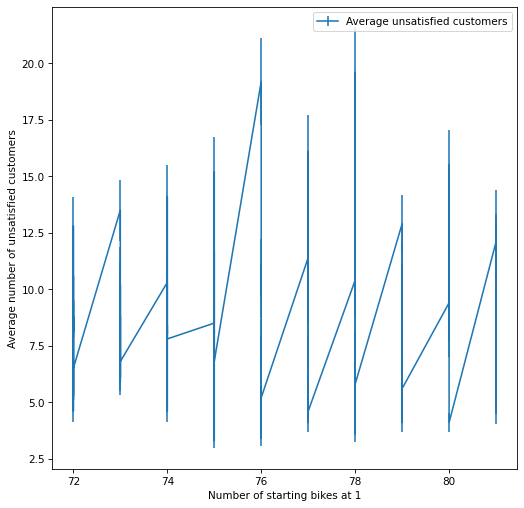

In [80]:
tu_avg_error = 0.1*np.array(tu_avg)

fig, ax = plt.subplots(1,1,figsize=(8,8))
ax.errorbar(nstart1, tu_avg, tu_avg_error, label='Average unsatisfied customers')
ax.set_xlabel('Number of starting bikes at 1')
ax.set_ylabel('Average number of unsatisfied customers')
ax.legend()

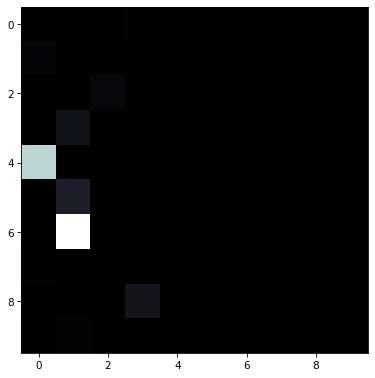

In [81]:

plt.imshow(cords ** 10, cmap="bone")
plt.show()

In [87]:
print(min(cords.flatten()))
print(np.where(cords == min(cords.flatten())))
print(cords[np.where(cords == min(cords.flatten()))])

3.3
(array([3], dtype=int64), array([6], dtype=int64))
[3.3]


75, 22, 3 gives 3.3 unsatified on average which was the minimum for this run. 

While the exact configuration varys with each run, it is always more than 70 bikes at the first location, most of the rest at the second location, and a couple if any at the third location.